In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta

In [3]:
ticker = 'AAPL'  # Example ticker
start_date = datetime.now() - timedelta(days=365)  # 1 year of data
end_date = datetime.now()

# Download the stock data
data = yf.download(ticker, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [7]:
# Print column names to check their structure
print("Columns in the data:", data.columns)

# If columns have multiple levels (MultiIndex), flatten them
if isinstance(data.columns, pd.MultiIndex):
    data.columns = data.columns.droplevel(1)  # Remove the second level of the column names

# Check the new column names after flattening (if needed)
print("Flattened Columns in the data:", data.columns)

# Ensure 'Adj Close' column is present
if 'Adj Close' not in data.columns:
    print("Error: 'Adj Close' column is missing from the data.")
else:
    # Calculate On-Balance Volume (OBV)
    # Calculate the daily change in price
    data['Daily Change'] = data['Adj Close'].diff()

    # Determine the direction: 1 for positive change, -1 for negative change, 0 for no change
    data['Direction'] = 0
    data.loc[data['Daily Change'] > 0, 'Direction'] = 1
    data.loc[data['Daily Change'] < 0, 'Direction'] = -1

    # Calculate the OBV as a cumulative sum (needs fixing)
    data['OBV'] = (data['Volume'] * data['Direction']).cumsum()


# Print to check
print(data[['Adj Close', 'Volume', 'OBV']].head())

Columns in the data: Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume', 'Daily Change',
       'Direction', 'OBV'],
      dtype='object', name='Price')
Flattened Columns in the data: Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume', 'Daily Change',
       'Direction', 'OBV'],
      dtype='object', name='Price')
Price                       Adj Close    Volume        OBV
Date                                                      
2023-11-13 00:00:00+00:00  183.899063  43627500          0
2023-11-14 00:00:00+00:00  186.526215  60108400   60108400
2023-11-15 00:00:00+00:00  187.093430  53790500  113898900
2023-11-16 00:00:00+00:00  188.785156  54412900  168311800
2023-11-17 00:00:00+00:00  188.765228  50922700  117389100


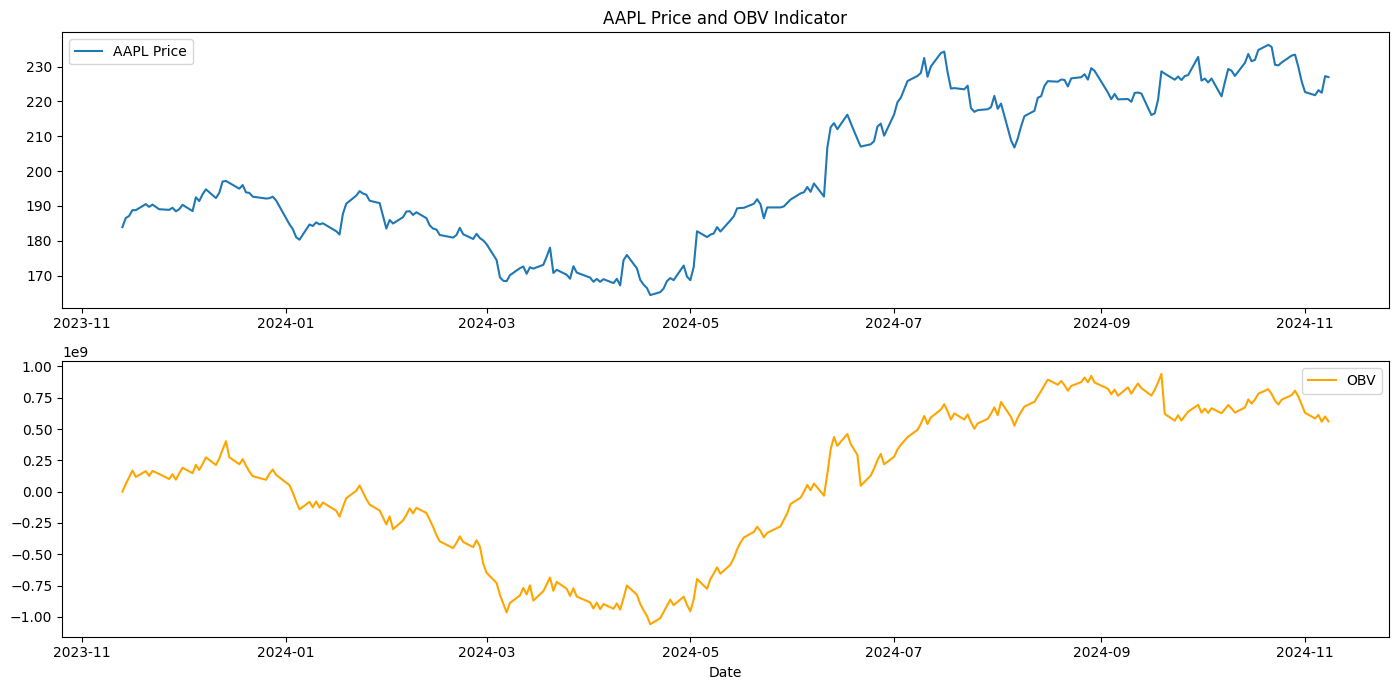

In [8]:
# Plotting OBV
plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(data['Adj Close'], label=f'{ticker} Price')
plt.title(f'{ticker} Price and OBV Indicator')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(data['OBV'], color='orange', label='OBV')
plt.xlabel('Date')
plt.legend()

plt.tight_layout()
plt.show()